### Read liabraries, data

In [9]:
import pandas as pd
import numpy as np
import pyreadr

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

from tabpfn import TabPFNRegressor
#from tabpfn_extensions import AutoTabPFNRegressor

In [10]:

result = pyreadr.read_r(r"data/usautoBI.rda")
print(result.keys())   # see available datasets inside

odict_keys(['usautoBI'])


In [11]:
loss = result["usautoBI"]

print(loss.shape)
print(loss.head())

df = pd.DataFrame(loss)

(1340, 8)
   CASENUM  ATTORNEY CLMSEX MARITAL CLMINSUR SEATBELT CLMAGE    LOSS
0        5       1.0      M     NaN        2        1     50  34.940
1       13       0.0      F       2        1        1     28  10.892
2       66       0.0      M       2        2        1      5   0.330
3       71       1.0      M       1        2        2     32  11.037
4       96       0.0      M       4        2        1     30   0.138


In [12]:

df_fit = df.drop(columns=['CASENUM'])

df_fit = df_fit.dropna()

df_fit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1091 entries, 1 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1091 non-null   float64
 1   CLMSEX    1091 non-null   object 
 2   MARITAL   1091 non-null   object 
 3   CLMINSUR  1091 non-null   object 
 4   SEATBELT  1091 non-null   object 
 5   CLMAGE    1091 non-null   object 
 6   LOSS      1091 non-null   float64
dtypes: float64(2), object(5)
memory usage: 68.2+ KB


### GBM

In [13]:

X = df_fit.drop(columns=['LOSS'])
y = df_fit['LOSS']

## Turn X into dummy categorical class apart from the 'AGE' variable
X = pd.get_dummies(X, columns=['ATTORNEY', 'CLMSEX', 'MARITAL', 'CLMINSUR', 'SEATBELT'], drop_first = True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

In [15]:
## Fit a GBM regression model and evaluate the model

model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 44)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")


RMSE: 15.28540047701383
R^2: 0.014130891253746558


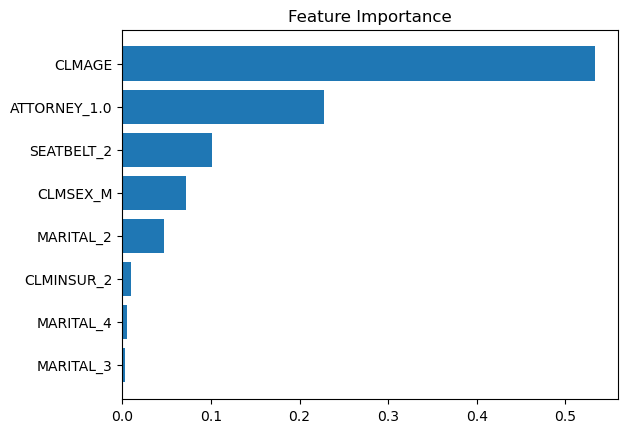

In [16]:
# Feature importance

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title('Feature Importance')
plt.show()

### Tabpfn

In [18]:
regressor = TabPFNRegressor()
regressor.fit(X_train, y_train)

predictions = regressor.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Squared Error (MSE): 225.19427407419568
R² Score: 0.049782643524265535


#### Use AUTORgressor per Colab notebook